In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon' 

train_data_path = join(data_dir, 'sales_train.csv') 
# sub_data_path = join(data_dir, 'test.csv')

# data 읽어보기

In [3]:
data = pd.read_csv(train_data_path)
print('train data dim : {}'.format(data.shape))

train data dim : (2935849, 6)


In [4]:
print(data.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


# item 확인하기

In [5]:
# 확인하기
items = pd.read_csv('items.csv')
items.head(50)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


# test 와 data와의 관계들

In [6]:
test = pd.read_csv('test.csv')
print(len(test)) # test 개수가 바로 추측해야하는 아이템 개수
test

214200


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [7]:
test_ndarray = test.values
test_ndarray

array([[     0,      5,   5037],
       [     1,      5,   5320],
       [     2,      5,   5233],
       ...,
       [214197,     45,  15757],
       [214198,     45,  19648],
       [214199,     45,    969]])

In [8]:
test_item_id = test_ndarray[:, 2]
test_item_id

array([ 5037,  5320,  5233, ..., 15757, 19648,   969])

In [9]:
test_item_id_uniq = np.unique(test_item_id)
print(len(test_item_id_uniq))
test_item_id_uniq

5100


array([   30,    31,    32, ..., 22164, 22166, 22167])

In [10]:
data_ndarray = data.values
data_ndarray

array([['02.01.2013', 0, 59, 22154, 999.0, 1.0],
       ['03.01.2013', 0, 25, 2552, 899.0, 1.0],
       ['05.01.2013', 0, 25, 2552, 899.0, -1.0],
       ...,
       ['14.10.2015', 33, 25, 7459, 349.0, 1.0],
       ['22.10.2015', 33, 25, 7440, 299.0, 1.0],
       ['03.10.2015', 33, 25, 7460, 299.0, 1.0]], dtype=object)

In [11]:
# item_id만 array로
data_item_id = data_ndarray[:, 3]
print(len(data_item_id))
data_item_id

2935849


array([22154, 2552, 2552, ..., 7459, 7440, 7460], dtype=object)

In [12]:
item_id_uniq = np.unique(data_item_id)
print(len(item_id_uniq))
item_id_uniq

21807


array([0, 1, 2, ..., 22167, 22168, 22169], dtype=object)

In [13]:
test_only = set(test_item_id_uniq) - set(item_id_uniq)
print(len(test_only))
test_only

363


{83,
 140,
 168,
 173,
 204,
 237,
 249,
 254,
 302,
 402,
 428,
 430,
 454,
 480,
 566,
 639,
 640,
 762,
 892,
 900,
 907,
 1184,
 1193,
 1246,
 1252,
 1253,
 1254,
 1284,
 1386,
 1394,
 1434,
 1436,
 1437,
 1574,
 1575,
 1577,
 1580,
 1585,
 1679,
 1683,
 1732,
 1864,
 1867,
 1884,
 1885,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 2420,
 2426,
 2427,
 2428,
 2434,
 2569,
 2722,
 2966,
 3022,
 3023,
 3271,
 3272,
 3273,
 3282,
 3284,
 3338,
 3349,
 3354,
 3405,
 3407,
 3408,
 3538,
 3571,
 3579,
 3604,
 3627,
 3760,
 3867,
 3908,
 3984,
 4060,
 4156,
 4310,
 4318,
 4412,
 4642,
 4925,
 5025,
 5064,
 5121,
 5248,
 5268,
 5269,
 5320,
 5321,
 5322,
 5441,
 5541,
 5569,
 5667,
 5721,
 5722,
 5812,
 5826,
 5843,
 5844,
 5961,
 5963,
 6152,
 6153,
 6169,
 6259,
 6335,
 6439,
 6519,
 6520,
 6521,
 6522,
 6523,
 6524,
 6525,
 6526,
 6527,
 6528,
 6529,
 6530,
 6531,
 6532,
 6533,
 6645,
 6729,
 6730,
 6731,
 6732,
 6733,
 6734,
 6742,
 6743,
 6863,
 6891,
 6903,
 6996,
 7094,
 7124,


test에만 있고 train에만 있는 것 
11월 신상품이 363개이다. 

어떻게 해야 신상품의 첫 달 판매량을 구할 수 있을까
노가다?
10 -> 15년 11월
21 -> 16년 11월 
신상품을 알아보자 

# 13년 11월 신상품

In [14]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [15]:
num_item_id = data.loc[:, ['date_block_num', 'item_id']]
num_item_id

,date_block_num,item_id
0,0,22154
1,0,2552
2,0,2552
3,0,2554
4,0,2555
...,...,...
2935844,33,7409
2935845,33,7460
2935846,33,7459
2935847,33,7440


## 13년 10월

In [16]:
# 13년 10월
tt_oct = num_item_id[num_item_id['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9])]
tt_oct

,date_block_num,item_id
0,0,22154
1,0,2552
2,0,2552
3,0,2554
4,0,2555
...,...,...
1027575,9,11812
1027576,9,11811
1027577,9,11623
1027578,9,5680


In [17]:
# 13 oct -> array
tt_oct_array = tt_oct.values
tt_oct_array

array([[    0, 22154],
       [    0,  2552],
       [    0,  2552],
       ...,
       [    9, 11623],
       [    9,  5680],
       [    9,  5682]])

In [18]:
# 13 oct array에서 추출 
tt_oct_item = tt_oct_array[:, 1]
print(len(tt_oct_item))
tt_oct_item

1027580


array([22154,  2552,  2552, ..., 11623,  5680,  5682])

In [19]:
# 중복제거
tt_oct_item_uniq = np.unique(tt_oct_item)
print(len(tt_oct_item_uniq))
tt_oct_item_uniq

13946


array([   12,    19,    27, ..., 22166, 22167, 22168])

## 13년 11월

In [20]:
# 13년 11월
tt_nov = num_item_id[num_item_id['date_block_num'] == 10]
tt_nov

,date_block_num,item_id
1027580,10,4420
1027581,10,10033
1027582,10,10051
1027583,10,10051
1027584,10,10051
...,...,...
1124311,10,3734
1124312,10,3734
1124313,10,3743
1124314,10,3743


In [21]:
# 13 nov -> array
tt_nov_array = tt_nov.values
tt_nov_array

array([[   10,  4420],
       [   10, 10033],
       [   10, 10051],
       ...,
       [   10,  3743],
       [   10,  3743],
       [   10,  3734]])

In [22]:
# 13 nov array에서 추출 
tt_nov_item = tt_nov_array[:, 1]
print(len(tt_nov_item))
tt_nov_item

96736


array([ 4420, 10033, 10051, ...,  3743,  3743,  3734])

In [23]:
# 중복제거
tt_nov_item_uniq = np.unique(tt_nov_item)
print(len(tt_nov_item_uniq))
tt_nov_item_uniq

8089


array([   27,    28,    30, ..., 22155, 22166, 22167])

In [24]:
# tt nov only
tt_nov_only = set(tt_nov_item_uniq) - set(tt_oct_item_uniq)
print('13년 11월 신상품 :', len(tt_nov_only))
print(type(tt_nov_only))
tt_nov_only

13년 11월 신상품 : 489
<class 'set'>


{58,
 74,
 87,
 99,
 294,
 342,
 499,
 514,
 517,
 540,
 568,
 643,
 658,
 669,
 673,
 681,
 693,
 704,
 714,
 721,
 722,
 725,
 770,
 773,
 781,
 815,
 843,
 910,
 1139,
 1152,
 1209,
 1413,
 1414,
 1426,
 1449,
 1495,
 1498,
 1502,
 1505,
 1506,
 1507,
 1510,
 1511,
 1514,
 1519,
 1639,
 1723,
 1724,
 1785,
 1852,
 1853,
 1927,
 1950,
 1961,
 1967,
 1994,
 1996,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2013,
 2019,
 2025,
 2263,
 2267,
 2269,
 2270,
 2273,
 2274,
 2278,
 2279,
 2331,
 2357,
 2358,
 2407,
 2408,
 2409,
 2625,
 2648,
 2658,
 2714,
 2796,
 2797,
 2806,
 2830,
 2888,
 2896,
 2899,
 2906,
 2908,
 2990,
 2992,
 2995,
 3108,
 3117,
 3119,
 3333,
 3525,
 3573,
 3594,
 3807,
 3899,
 3904,
 3930,
 4196,
 4231,
 4271,
 4285,
 4286,
 4303,
 4311,
 4351,
 4352,
 4353,
 4355,
 4427,
 4428,
 4563,
 4568,
 4591,
 4647,
 4670,
 4679,
 4718,
 4737,
 4928,
 4933,
 4949,
 5050,
 5058,
 5071,
 5083,
 5094,
 5100,
 5103,
 5104,
 5127,
 5137,
 5149,
 5154,
 5161,
 5163,
 5166,
 51

In [25]:
lst_tt_nov_only = list(tt_nov_only)
lst_tt_nov_only

[16389,
 10248,
 20492,
 8206,
 8207,
 20499,
 12321,
 12322,
 18484,
 18485,
 10297,
 58,
 10299,
 16442,
 16443,
 20546,
 12356,
 12357,
 74,
 87,
 14427,
 12380,
 99,
 4196,
 14441,
 10346,
 10351,
 14451,
 14454,
 4231,
 6285,
 16527,
 16528,
 8349,
 18590,
 16548,
 4271,
 4285,
 4286,
 18623,
 6339,
 4303,
 16591,
 6358,
 2263,
 4311,
 14554,
 2267,
 8411,
 2269,
 2270,
 6367,
 14557,
 2273,
 2274,
 2278,
 2279,
 20724,
 4351,
 4352,
 4353,
 4355,
 18702,
 18703,
 6419,
 2331,
 6428,
 294,
 8489,
 10543,
 2357,
 2358,
 20792,
 6459,
 14657,
 10570,
 4427,
 4428,
 8523,
 342,
 20822,
 20824,
 20826,
 2407,
 2408,
 2409,
 18801,
 18804,
 16758,
 18810,
 18813,
 18815,
 20866,
 12692,
 14740,
 18837,
 18838,
 18839,
 8605,
 8606,
 18850,
 20901,
 20902,
 10665,
 18858,
 10690,
 18884,
 16837,
 18886,
 4563,
 4568,
 12763,
 12764,
 8670,
 18922,
 4591,
 10736,
 6641,
 499,
 20047,
 514,
 517,
 18954,
 8720,
 6675,
 10771,
 18963,
 540,
 16925,
 16926,
 8739,
 16933,
 4647,
 8744,
 148

## 13년 11월 신상품 얼마인지 dict이나 dataframe으로 그리고 가격

In [26]:
# 13년 11월
tt_nov_new = data[data['item_id'].isin(lst_tt_nov_only)]
tt_nov_new = tt_nov_new[tt_nov_new['date_block_num'] == 10]
tt_nov_new

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1027637,30.11.2013,10,28,10297,749.0,1.0
1027690,30.11.2013,10,28,10299,1399.0,1.0
1027713,21.11.2013,10,28,9077,299.0,1.0
1027714,24.11.2013,10,28,9077,299.0,1.0
1027715,30.11.2013,10,28,9077,299.0,1.0
...,...,...,...,...,...,...
1124068,29.11.2013,10,50,3333,2599.0,8.0
1124125,29.11.2013,10,50,4271,2799.0,7.0
1124196,30.11.2013,10,50,3899,299.0,1.0
1124234,29.11.2013,10,50,4231,2799.0,25.0


In [27]:
len(tt_nov_item) - len(tt_nov_new)

82976

82976개는 기존에도 팔던거,  
13760개는 11월 신상품

In [28]:
print(tt_nov_new['item_price'].describe())

count    13760.000000
mean      1128.557608
std       1693.105961
min         22.400000
25%        399.000000
50%        699.000000
75%       1399.000000
max      18665.000000
Name: item_price, dtype: float64


13년 11월 신상품의 가격 평균은 1128.56 이다.

# 14년 11월 신상품

## 14년 10월까지 팔렸던 상품들

In [29]:
# 14년 10월까지
ft_oct = num_item_id[num_item_id['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9,10,11,
                                                         12,13,14,15,16,17,18,19,20,21])]
ft_oct

,date_block_num,item_id
0,0,22154
1,0,2552
2,0,2552
3,0,2554
4,0,2555
...,...,...
2106204,21,7351
2106205,21,7492
2106206,21,7215
2106207,21,12596


In [30]:
# 14 oct -> array
ft_oct_array = ft_oct.values
ft_oct_array

array([[    0, 22154],
       [    0,  2552],
       [    0,  2552],
       ...,
       [   21,  7215],
       [   21, 12596],
       [   21, 18335]])

In [31]:
# 14 oct array에서 추출 
ft_oct_item = ft_oct_array[:, 1]
print(len(ft_oct_item))
ft_oct_item

2106209


array([22154,  2552,  2552, ...,  7215, 12596, 18335])

In [32]:
# 중복제거
ft_oct_item_uniq = np.unique(ft_oct_item)
print(len(ft_oct_item_uniq))
ft_oct_item_uniq

18115


array([    0,     1,     2, ..., 22167, 22168, 22169])

## 14년 11월 신상품

In [33]:
# 14년 11월
ft_nov = num_item_id[num_item_id['date_block_num'] == 22]
ft_nov

,date_block_num,item_id
2106209,22,3460
2106210,22,4615
2106211,22,4870
2106212,22,4870
2106213,22,4870
...,...,...
2192632,22,59
2192633,22,59
2192634,22,77
2192635,22,32


In [34]:
# 14 nov -> array
ft_nov_array = ft_nov.values
ft_nov_array

array([[  22, 3460],
       [  22, 4615],
       [  22, 4870],
       ...,
       [  22,   77],
       [  22,   32],
       [  22,   32]])

In [35]:
# 14 nov array에서 추출 
ft_nov_item = ft_nov_array[:, 1]
print(len(ft_nov_item))
ft_nov_item

86428


array([3460, 4615, 4870, ...,   77,   32,   32])

In [36]:
# 중복제거
ft_nov_item_uniq = np.unique(ft_nov_item)
print(len(ft_nov_item_uniq))
ft_nov_item_uniq

6322


array([    2,    11,    15, ..., 22146, 22166, 22167])

In [37]:
# ft nov only
ft_nov_only = set(ft_nov_item_uniq) - set(ft_oct_item_uniq)
print('14년 11월 신상품 :', len(ft_nov_only))
print(type(ft_nov_only))
ft_nov_only

14년 11월 신상품 : 460
<class 'set'>


{11,
 15,
 107,
 108,
 179,
 220,
 236,
 270,
 396,
 757,
 856,
 962,
 1185,
 1450,
 1534,
 1535,
 1542,
 1543,
 1548,
 1549,
 1550,
 1553,
 1555,
 1556,
 1557,
 1559,
 1564,
 1565,
 1569,
 1570,
 1774,
 1784,
 1789,
 1792,
 1794,
 1797,
 1798,
 2261,
 2283,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2294,
 2295,
 2296,
 2297,
 2347,
 2418,
 2591,
 2592,
 2597,
 2643,
 2651,
 2729,
 2834,
 2837,
 2841,
 2842,
 2928,
 2970,
 2978,
 3026,
 3027,
 3028,
 3029,
 3030,
 3031,
 3032,
 3033,
 3216,
 3217,
 3218,
 3241,
 3257,
 3258,
 3259,
 3396,
 3398,
 3403,
 3411,
 3447,
 3448,
 3449,
 3450,
 3451,
 3452,
 3455,
 3460,
 3461,
 3462,
 3463,
 3464,
 3466,
 3537,
 3602,
 3641,
 3672,
 3675,
 3733,
 3735,
 3774,
 3789,
 3791,
 3841,
 3842,
 3891,
 3931,
 4011,
 4191,
 4198,
 4217,
 4219,
 4334,
 4335,
 4336,
 4337,
 4338,
 4339,
 4341,
 4342,
 4346,
 4369,
 4424,
 4478,
 4479,
 4491,
 4494,
 4495,
 4730,
 4854,
 4871,
 4881,
 4903,
 4905,
 4917,
 4951,
 4954,
 5010,

In [38]:
# list로 만들기 
lst_ft_nov_only = list(ft_nov_only)
lst_ft_nov_only

[6145,
 18441,
 11,
 15,
 6170,
 6171,
 8218,
 6173,
 8221,
 8227,
 6225,
 6226,
 6234,
 4191,
 4198,
 14442,
 107,
 108,
 20587,
 12399,
 12407,
 4217,
 14458,
 4219,
 12411,
 6276,
 20631,
 8348,
 10402,
 18594,
 6308,
 20644,
 8366,
 179,
 20670,
 12480,
 18635,
 12496,
 2261,
 8410,
 220,
 20703,
 8417,
 2283,
 236,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2295,
 2296,
 2297,
 2294,
 4342,
 4339,
 4341,
 6398,
 4346,
 6411,
 270,
 4369,
 6420,
 6421,
 10518,
 8472,
 6426,
 2347,
 14663,
 4424,
 8527,
 10596,
 18796,
 6509,
 20848,
 14705,
 2418,
 14707,
 14710,
 20857,
 4478,
 4479,
 4491,
 396,
 4494,
 4495,
 18831,
 18834,
 12693,
 18840,
 16798,
 12704,
 18851,
 16806,
 8615,
 16809,
 16814,
 20911,
 10675,
 20922,
 20923,
 20926,
 18887,
 8658,
 12814,
 16911,
 2591,
 2592,
 2597,
 10793,
 16951,
 12867,
 2643,
 21075,
 12889,
 2651,
 19036,
 20475,
 10868,
 10870,
 4730,
 19087,
 15000,
 10905,
 15001,
 19098,
 2729,
 19113,
 19116,
 19117,
 19118

## 14년 11월 신상품 얼마인지 dict이나 dataframe으로 그리고 가격

In [39]:
# 14년 11월
ft_nov_new = data[data['item_id'].isin(lst_ft_nov_only)]
ft_nov_new = ft_nov_new[ft_nov_new['date_block_num'] == 22]
ft_nov_new

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2106209,19.11.2014,22,37,3460,1299.0,3.0
2106256,21.11.2014,22,33,4334,799.0,1.0
2106257,28.11.2014,22,33,4334,799.0,1.0
2106259,23.11.2014,22,33,4337,2999.0,1.0
2106270,26.11.2014,22,33,4478,2499.0,1.0
...,...,...,...,...,...,...
2192494,21.11.2014,22,46,21387,1529.0,1.0
2192495,20.11.2014,22,46,21387,1444.0,2.0
2192498,21.11.2014,22,46,21430,799.0,1.0
2192500,28.11.2014,22,46,21976,1349.0,1.0


In [40]:
len(ft_nov_item) - len(ft_nov_new)

70784

70784 기존 제품 판매량  
15644 신상품 460개에 대한 판매량

In [41]:
print(ft_nov_new['item_price'].describe())

count    15644.000000
mean      2096.400350
std       2606.630176
min         10.000000
25%        699.000000
50%       1619.000000
75%       2999.000000
max      40900.000000
Name: item_price, dtype: float64


In [42]:
print(ft_nov_new['item_price'].describe())

count    15644.000000
mean      2096.400350
std       2606.630176
min         10.000000
25%        699.000000
50%       1619.000000
75%       2999.000000
max      40900.000000
Name: item_price, dtype: float64


각 년도의 11월 신상품에 대한 평균 가격 차이가 많이 난다.

# 신상품에 대한 평균적 판매량

In [43]:
print(tt_nov_new['item_cnt_day'].describe())

count    13760.000000
mean         2.039026
std          3.889715
min         -2.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        126.000000
Name: item_cnt_day, dtype: float64


In [44]:
print(ft_nov_new['item_cnt_day'].describe())

count    15644.000000
mean         2.006328
std          4.250637
min         -1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        167.000000
Name: item_cnt_day, dtype: float64


판매량의 평균은 2개로 동일  
oh oh goog

# 34개월 동안 판매량 describe

In [45]:
print(data['item_cnt_day'].describe())

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64


아이템 별 판매 수량이 -22 부터 2169가 팔린것을 확인 할 수 있다. 

# 어떤 아이템이 제일 많이 팔렸는지 궁금해

In [46]:
# dataframe -> ndarray
data_ndarray = data.values
data_ndarray

array([['02.01.2013', 0, 59, 22154, 999.0, 1.0],
       ['03.01.2013', 0, 25, 2552, 899.0, 1.0],
       ['05.01.2013', 0, 25, 2552, 899.0, -1.0],
       ...,
       ['14.10.2015', 33, 25, 7459, 349.0, 1.0],
       ['22.10.2015', 33, 25, 7440, 299.0, 1.0],
       ['03.10.2015', 33, 25, 7460, 299.0, 1.0]], dtype=object)

In [47]:
org_data = data
del data['date']
del data['date_block_num']
del data['shop_id']
del data['item_cnt_day']

id_and_price = data

In [48]:
id_and_price.head()

,item_id,item_price
0,22154,999.00
1,2552,899.00
2,2552,899.00
3,2554,1709.05
4,2555,1099.00


In [49]:
print(id_and_price.groupby(data['item_id']).count().sort_values(['item_price'], ascending=False))

         item_price
item_id            
20949         31340
5822           9408
17717          9067
2808           7479
4181           6853
...             ...
10752             1
10753             1
10799             1
10835             1
22169             1

[21807 rows x 1 columns]


In [52]:
print(id_and_price.groupby(data['item_id']).count())

         item_price
item_id            
0                 1
1                 6
2                 2
3                 2
4                 1
...             ...
22165             2
22166           270
22167          1114
22168             6
22169             1

[21807 rows x 1 columns]


\#20949가 압도적으로 많이 팔렸다. 가격을 확인해보자.

# 각 년도별 판매 추이 
- 사실 2015년은 메르스가 유행했던 시절이다. 러시아 사람들이 공공보건을 잘 지켰을 지는 모르겠지만 판매품들은 대부분 소프트웨어와 하드웨어와 관련된 제품들이다. 이에 **년도와 판매 추이의 관련성**이 존재하는지 증명하려고 한다. 

## 13년도

In [109]:
data = pd.read_csv(train_data_path)
num_item_cnt = data.loc[:, ['date_block_num', 'item_id', 'item_cnt_day']]
num_item_cnt

,date_block_num,item_id,item_cnt_day
0,0,22154,1.0
1,0,2552,1.0
2,0,2552,-1.0
3,0,2554,1.0
4,0,2555,1.0
...,...,...,...
2935844,33,7409,1.0
2935845,33,7460,1.0
2935846,33,7459,1.0
2935847,33,7440,1.0


In [199]:
# 13_jan
tt_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([0])]
num_item_cnt_jan = tt_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_jan

131479.0

In [200]:
# 13_feb
tt_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([1])]
num_item_cnt_feb = tt_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_feb

128090.0

In [201]:
# 13_mar
tt_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([2])]
num_item_cnt_mar = tt_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_mar

147142.0

In [202]:
# 13_apr
tt_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([3])]
num_item_cnt_apr = tt_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_apr

107190.0

In [203]:
# 13_may
tt_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([4])]
num_item_cnt_may = tt_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_may

106970.0

In [204]:
# 13_jun
tt_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([5])]
num_item_cnt_jun = tt_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_jun

125381.0

In [205]:
# 13_jul
tt_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([6])]
num_item_cnt_jul = tt_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_jul

116966.0

In [206]:
# 13_aug
tt_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([7])]
num_item_cnt_aug = tt_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_aug

125291.0

In [207]:
# 13_sep
tt_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([8])]
num_item_cnt_sep = tt_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_sep

133332.0

In [208]:
# 13_oct
tt_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([9])]
num_item_cnt_oct = tt_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_oct

127541.0

In [209]:
# 13_nov
tt_cnt_nov = num_item_cnt[num_item_cnt['date_block_num'].isin([10])]
num_item_cnt_nov = tt_cnt_nov['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_nov

130009.0

In [210]:
# 13_dec
tt_cnt_dec = num_item_cnt[num_item_cnt['date_block_num'].isin([11])]
num_item_cnt_dec = tt_cnt_dec['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
num_item_cnt_dec

183342.0

In [211]:
cnt_per_month = (num_item_cnt_jan,
                     num_item_cnt_feb,
                     num_item_cnt_mar,
                     num_item_cnt_apr,
                     num_item_cnt_may,
                     num_item_cnt_jun,
                     num_item_cnt_jul,
                     num_item_cnt_aug,
                     num_item_cnt_sep,
                     num_item_cnt_oct,
                     num_item_cnt_nov,
                     num_item_cnt_dec)

In [212]:
type(cnt_per_month)

tuple

In [213]:
cnt_per_month = list(cnt_per_month)
type(cnt_per_month)

list

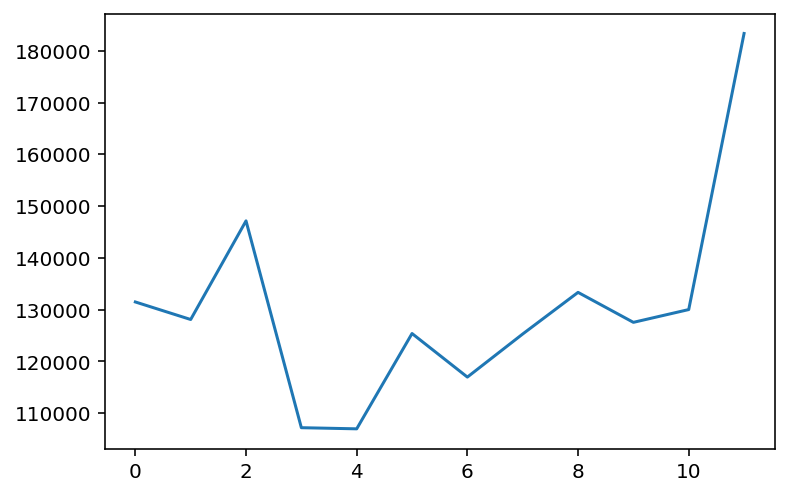

In [214]:
plt.plot(cnt_per_month)
plt.show()

## 14년도

In [164]:
# 14_jan
ft_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([12])]
ft_num_item_cnt_jan = ft_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_jan

116899.0

In [165]:
# 14_feb
ft_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([13])]
ft_num_item_cnt_feb = ft_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_feb

109687.0

In [166]:
# 14_mar
ft_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([14])]
ft_num_item_cnt_mar = ft_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_mar

115297.0

In [167]:
# 14_apr
ft_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([15])]
ft_num_item_cnt_apr = ft_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_apr

96556.0

In [168]:
# 14_may
ft_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([16])]
ft_num_item_cnt_may = ft_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_may

97790.0

In [169]:
# 14_jun
ft_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([17])]
ft_num_item_cnt_jun = ft_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_jun

97429.0

In [170]:
# 14_jul
ft_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([18])]
ft_num_item_cnt_jul = ft_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_jul

91280.0

In [171]:
# 14_aug
ft_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([19])]
ft_num_item_cnt_aug = ft_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_aug

102721.0

In [172]:
# 14_sep
ft_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([20])]
ft_num_item_cnt_sep = ft_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_sep

99208.0

In [173]:
# 14_oct
ft_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([21])]
ft_num_item_cnt_oct = ft_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_oct

107422.0

In [174]:
# 14_nov
ft_cnt_nov = num_item_cnt[num_item_cnt['date_block_num'].isin([22])]
ft_num_item_cnt_nov = ft_cnt_nov['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_nov

117845.0

In [175]:
# 14_dec
ft_cnt_dec = num_item_cnt[num_item_cnt['date_block_num'].isin([23])]
ft_num_item_cnt_dec = ft_cnt_dec['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
ft_num_item_cnt_dec

168755.0

In [176]:
ft_cnt_per_month = (ft_num_item_cnt_jan,
                     ft_num_item_cnt_feb,
                     ft_num_item_cnt_mar,
                     ft_num_item_cnt_apr,
                     ft_num_item_cnt_may,
                     ft_num_item_cnt_jun,
                     ft_num_item_cnt_jul,
                     ft_num_item_cnt_aug,
                     ft_num_item_cnt_sep,
                     ft_num_item_cnt_oct,
                     ft_num_item_cnt_nov,
                     ft_num_item_cnt_dec)

In [177]:
type(ft_cnt_per_month)

tuple

In [178]:
ft_cnt_per_month = list(ft_cnt_per_month)
type(ft_cnt_per_month)

list

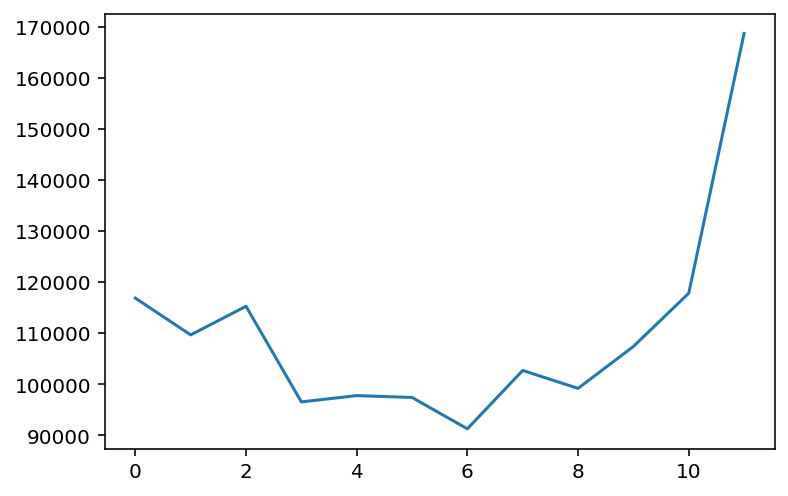

In [179]:
plt.plot(ft_cnt_per_month)
plt.show()

## 15년도

In [180]:
# 15_jan
fft_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([24])]
fft_num_item_cnt_jan = fft_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_jan

110971.0

In [181]:
# 15_feb
fft_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([25])]
fft_num_item_cnt_feb = fft_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_feb

84198.0

In [182]:
# 15_mar
fft_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([26])]
fft_num_item_cnt_mar = fft_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_mar

82014.0

In [183]:
# 15_apr
fft_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([27])]
fft_num_item_cnt_apr = fft_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_apr

77827.0

In [184]:
# 15_may
fft_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([28])]
fft_num_item_cnt_may = fft_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_may

72295.0

In [185]:
# 15_jun
fft_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([29])]
fft_num_item_cnt_jun = fft_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_jun

64114.0

In [186]:
# 15_jul
fft_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([30])]
fft_num_item_cnt_jul = fft_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_jul

63187.0

In [187]:
# 15_aug
fft_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([31])]
fft_num_item_cnt_aug = fft_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_aug

66079.0

In [188]:
# 15_sep
fft_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([32])]
fft_num_item_cnt_sep = fft_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_sep

72843.0

In [189]:
# 15_oct
fft_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([33])]
fft_num_item_cnt_oct = fft_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> 세로합
fft_num_item_cnt_oct

71056.0

In [190]:
fft_cnt_per_month = (fft_num_item_cnt_jan,
                     fft_num_item_cnt_feb,
                     fft_num_item_cnt_mar,
                     fft_num_item_cnt_apr,
                     fft_num_item_cnt_may,
                     fft_num_item_cnt_jun,
                     fft_num_item_cnt_jul,
                     fft_num_item_cnt_aug,
                     fft_num_item_cnt_sep,
                     fft_num_item_cnt_oct)

In [191]:
type(fft_cnt_per_month)

tuple

In [192]:
fft_cnt_per_month = list(fft_cnt_per_month)
type(fft_cnt_per_month)

list

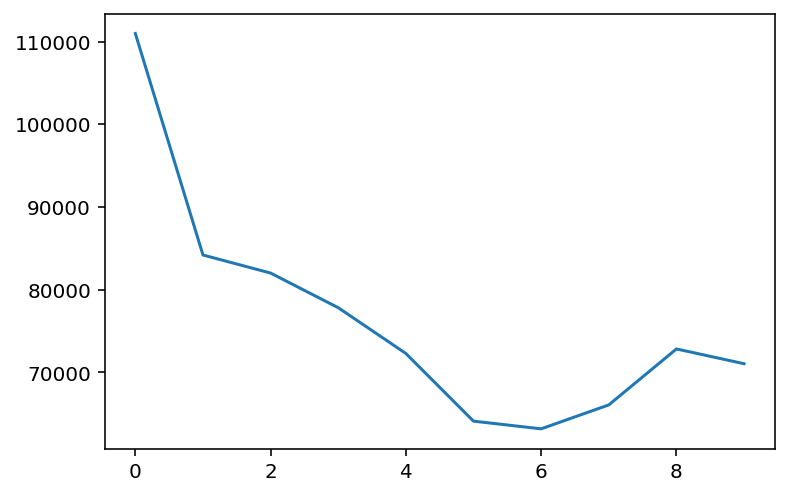

In [193]:
plt.plot(fft_cnt_per_month)
plt.show()

## 모음

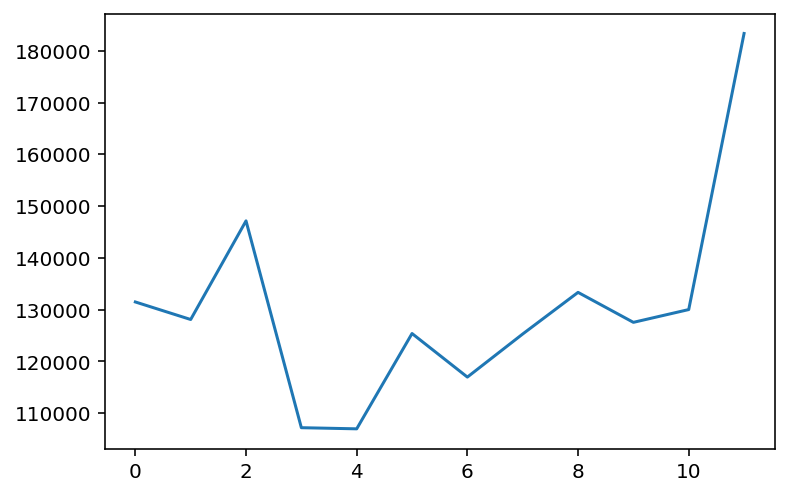

In [215]:
plt.plot(cnt_per_month)
plt.show()

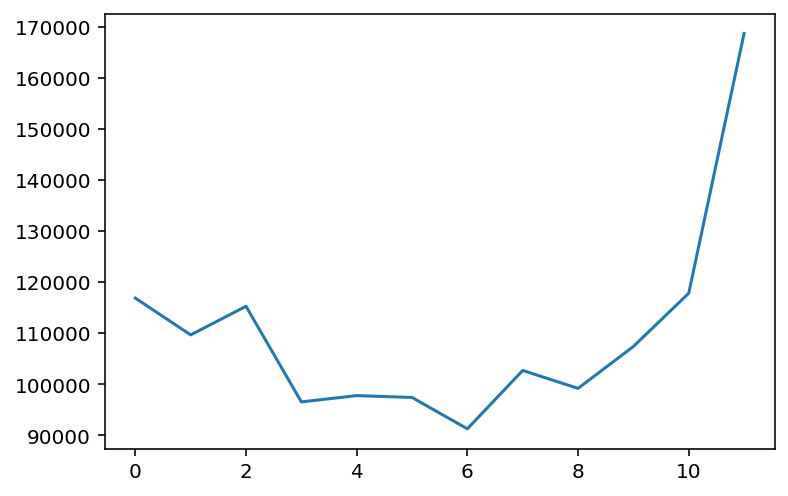

In [198]:
plt.plot(ft_cnt_per_month)
plt.show()

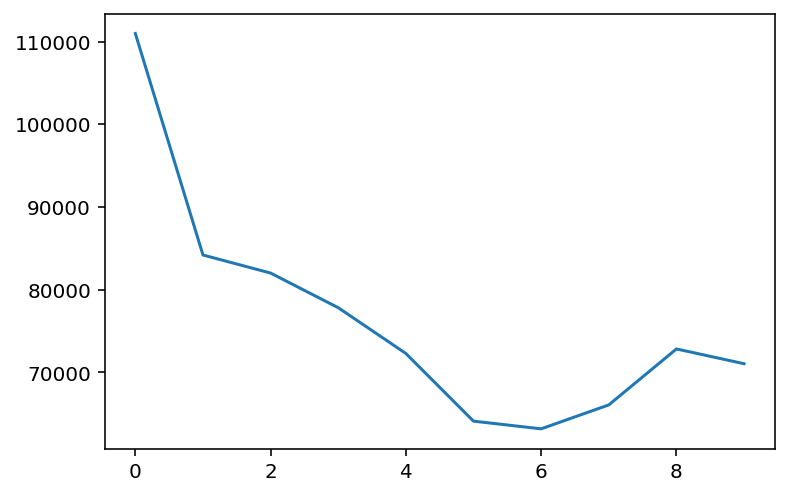

In [196]:
plt.plot(fft_cnt_per_month)
plt.show()

In [112]:
# 13_jan
tt_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([0])]
tt_cnt_jan

,date_block_num,item_id,item_cnt_day
0,0,22154,1.0
1,0,2552,1.0
2,0,2552,-1.0
3,0,2554,1.0
4,0,2555,1.0
...,...,...,...
115685,0,32,1.0
115686,0,32,1.0
115687,0,35,2.0
115688,0,621,1.0


In [113]:
tt_cnt_jan = tt_cnt_jan.values
tt_cnt_jan

array([[ 0.0000e+00,  2.2154e+04,  1.0000e+00],
       [ 0.0000e+00,  2.5520e+03,  1.0000e+00],
       [ 0.0000e+00,  2.5520e+03, -1.0000e+00],
       ...,
       [ 0.0000e+00,  3.5000e+01,  2.0000e+00],
       [ 0.0000e+00,  6.2100e+02,  1.0000e+00],
       [ 0.0000e+00,  3.2000e+01,  1.0000e+00]])

In [114]:
tt_cnt_jan = tt_cnt_jan[:, 2]
tt_cnt_jan

array([ 1.,  1., -1., ...,  2.,  1.,  1.])

In [116]:
tt_cnt_jan = list(tt_cnt_jan)
sum(tt_cnt_jan)

131479.0

In [117]:
# 13_feb
tt_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([1])]

tt_cnt_feb = tt_cnt_feb.values

tt_cnt_feb = tt_cnt_feb[:, 2] 

sum(tt_cnt_feb)

128090.0

In [118]:
# 13_mar
tt_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([2])]

tt_cnt_mar = tt_cnt_mar.values

tt_cnt_mar = tt_cnt_mar[:, 2] 

sum(tt_cnt_mar)

147142.0

In [104]:
# 13년도 판매
tt_cnt = num_item_cnt[num_item_cnt['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9,10,11])]
tt_cnt

,date,date_block_num,item_id,item_cnt_day
0,02.01.2013,0,22154,1.0
1,03.01.2013,0,2552,1.0
2,05.01.2013,0,2552,-1.0
3,06.01.2013,0,2554,1.0
4,15.01.2013,0,2555,1.0
...,...,...,...,...
1267557,06.12.2013,11,5671,1.0
1267558,01.12.2013,11,5671,3.0
1267559,26.12.2013,11,5669,2.0
1267560,25.12.2013,11,5669,1.0


In [102]:
tt_cnt['date'] = pd.to_datetime(tt_cnt["date"])
tt_cnt

,date,date_block_num,item_id,item_cnt_day
0,2013-02-01,0,22154,1.0
1,2013-03-01,0,2552,1.0
2,2013-05-01,0,2552,-1.0
3,2013-06-01,0,2554,1.0
4,2013-01-15,0,2555,1.0
...,...,...,...,...
1267557,2013-06-12,11,5671,1.0
1267558,2013-01-12,11,5671,3.0
1267559,2013-12-26,11,5669,2.0
1267560,2013-12-25,11,5669,1.0


In [103]:
# tt_cnt = tt_cnt.sort_values(by = ['date_block_num'])
# tt_cnt

In [105]:
tt_items = tt_cnt.groupby(['item_id'])['item_cnt_day'].sum().sort_values(ascending=False)
tt_items

item_id
20949    63748.0
2808     12214.0
3732     11981.0
3734      7649.0
16787     6430.0
          ...   
4591         0.0
11871       -1.0
18062       -1.0
13474       -1.0
1590       -11.0
Name: item_cnt_day, Length: 14971, dtype: float64

In [106]:
tt_items.describe()

count    14971.000000
mean       104.384009
std        607.878383
min        -11.000000
25%          5.000000
50%         24.000000
75%         79.000000
max      63748.000000
Name: item_cnt_day, dtype: float64

In [107]:
type(tt_items)

pandas.core.series.Series

In [108]:
# series -> dataframe
tt_items = tt_items.to_frame()
tt_items

,item_cnt_day
item_id,
20949,63748.0
2808,12214.0
3732,11981.0
3734,7649.0
16787,6430.0
...,...
4591,0.0
11871,-1.0
18062,-1.0


In [91]:
print(tt_items[['item_cnt_day']])

         item_cnt_day
item_id              
20949         63748.0
2808          12214.0
3732          11981.0
3734           7649.0
16787          6430.0
...               ...
4591              0.0
11871            -1.0
18062            -1.0
13474            -1.0
1590            -11.0

[14971 rows x 1 columns]


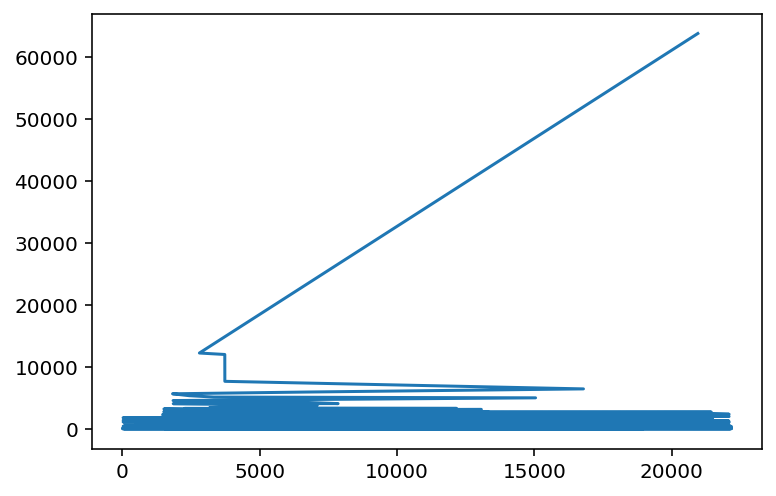

In [93]:
plt.plot(tt_items['item_cnt_day'])
plt.show()

In [79]:
print(tt_items['item_id', 'item_cnt_day'])

plt.plot(tt_items['item_id'],tt_items['item_cnt_day'])
plt.show()

KeyError: ('item_id', 'item_cnt_day')